# Techacademy Data Science SS25 - Ports

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the data
ports = pd.read_csv("data/Ports.csv")
ports.head()

,X,Y,portid,portname,country,ISO3,continent,fullname,lat,lon,...,vessel_count_tanker,industry_top1,industry_top2,industry_top3,share_country_maritime_import,share_country_maritime_export,LOCODE,pageid,countrynoaccents,ObjectId
0,1.514731e+07,4.254924e+06,port1325,Tsuruga,Japan,JPN,Asia & Pacific,"Tsuruga, Japan",35.667194,136.070611,...,45,Mineral Products,Wood & Wood Products,Vegetable Products,0.45,0.09,NaN,3b1f40eb8acd452ab6229331302891fe,Japan,1
1,1.099633e+07,1.931654e+05,port1198,Sibolga,Indonesia,IDN,Asia & Pacific,"Sibolga, Indonesia",1.734969,98.781715,...,54,Mineral Products,Prepared Foodstuffs & Beverages,Vegetable Products,0.01,0.00,NaN,4d00b008b4be4068bf8a19d7da6e8cf6,Indonesia,2
2,1.206306e+07,2.465269e+06,port339,Fang-Cheng,China,CHN,Asia & Pacific,"Fang-Cheng, China",21.614205,108.364339,...,180,Mineral Products,Chemical & Allied Industries,Vegetable Products,3.26,0.63,NaN,266042b244cf452a89f4a2de14f3da2f,China,3
3,1.460658e+07,4.021402e+06,port1335,Ube,Japan,JPN,Asia & Pacific,"Ube, Japan",33.944875,131.213184,...,2095,Mineral Products,Chemical & Allied Industries,"Plastics, Rubber, Leather",0.75,1.68,NaN,f3f6725ef00e4d3f8f9c93c45258667e,Japan,4
4,1.874177e+07,-5.875428e+06,port153,Bluff Harbor,New Zealand,NZL,Asia & Pacific,"Bluff Harbor, New Zealand",-46.590130,168.360216,...,56,Wood & Wood Products,Metals,Prepared Foodstuffs & Beverages,6.44,2.52,NaN,894ab5e5a18e48b6922c023196f74c8f,New Zealand,5


In [4]:
ports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   X                              1666 non-null   float64
 1   Y                              1666 non-null   float64
 2   portid                         1666 non-null   object 
 3   portname                       1666 non-null   object 
 4   country                        1666 non-null   object 
 5   ISO3                           1666 non-null   object 
 6   continent                      1666 non-null   object 
 7   fullname                       1666 non-null   object 
 8   lat                            1666 non-null   float64
 9   lon                            1666 non-null   float64
 10  vessel_count_total             1666 non-null   int64  
 11  vessel_count_container         1666 non-null   int64  
 12  vessel_count_dry_bulk          1666 non-null   i

## Data Cleaning
- Column names
- Handling missing values
- Trade balance ratio
- Categorize Ports by Vessel Count (numerical → categorical, Low, Medium, High)
- Port location Category (Northern/Southern or Western/Eastern Hemisphere)

### Drop columns

In [9]:
# Question: Any difference between column "country" & "countrynoaccents"
ports[["country", "countrynoaccents"]][ports["country"] != ports["countrynoaccents"]]

# Answer: No, except for the special characters. countrynoaccents can be dropped.

,country,countrynoaccents
40,Côte d'Ivoire,Cote d'Ivoire
49,Côte d'Ivoire,Cote d'Ivoire
206,Türkiye,Turkiye
207,Türkiye,Turkiye
208,Türkiye,Turkiye
209,Türkiye,Turkiye
210,Türkiye,Turkiye
211,Türkiye,Turkiye
212,Türkiye,Turkiye
213,Türkiye,Turkiye


In [15]:
# Drop unwanted columns
columns_to_drop = ["X", "Y", "LOCODE", "pageid", "countrynoaccents", "ObjectId"]
ports = ports.drop(columns = columns_to_drop)

In [16]:
# Check the dataframe again
ports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   portid                         1666 non-null   object 
 1   portname                       1666 non-null   object 
 2   country                        1666 non-null   object 
 3   ISO3                           1666 non-null   object 
 4   continent                      1666 non-null   object 
 5   fullname                       1666 non-null   object 
 6   lat                            1666 non-null   float64
 7   lon                            1666 non-null   float64
 8   vessel_count_total             1666 non-null   int64  
 9   vessel_count_container         1666 non-null   int64  
 10  vessel_count_dry_bulk          1666 non-null   int64  
 11  vessel_count_general_cargo     1666 non-null   int64  
 12  vessel_count_RoRo              1666 non-null   i

### Handling missing values

In [18]:
ports.isna().sum()

# Missing values are only in the industry top. So not important for me yet

portid                             0
portname                           0
country                            0
ISO3                               0
continent                          0
fullname                           0
lat                                0
lon                                0
vessel_count_total                 0
vessel_count_container             0
vessel_count_dry_bulk              0
vessel_count_general_cargo         0
vessel_count_RoRo                  0
vessel_count_tanker                0
industry_top1                    292
industry_top2                    292
industry_top3                    293
share_country_maritime_import      0
share_country_maritime_export      0
dtype: int64

### Trade balance ratio (also known as the Export to Import Ratio)
$$Trade balance = [Export - Import]$$
$$Trade balance ratio = [Value of Exports] / [Value of Imports] * 100$$

**Trade Surplus:**
If the trade balance is positive (exports > imports), the ratio will be greater than 100, indicating a surplus. 
**Trade Deficit:**
If the trade balance is negative (imports > exports), the ratio will be less than 100, indicating a deficit. 
**Balanced Trade:**
If the trade balance is zero (exports = imports), the ratio will be 100, indicating a balanced trade. 

In [19]:
ports["trade_balance_ratio"] = ports["share_country_maritime_export"]/ports["share_country_maritime_import"]
ports.head()

,portid,portname,country,ISO3,continent,fullname,lat,lon,vessel_count_total,vessel_count_container,vessel_count_dry_bulk,vessel_count_general_cargo,vessel_count_RoRo,vessel_count_tanker,industry_top1,industry_top2,industry_top3,share_country_maritime_import,share_country_maritime_export,trade_balance_ratio
0,port1325,Tsuruga,Japan,JPN,Asia & Pacific,"Tsuruga, Japan",35.667194,136.070611,481,46,98,121,169,45,Mineral Products,Wood & Wood Products,Vegetable Products,0.45,0.09,0.200000
1,port1198,Sibolga,Indonesia,IDN,Asia & Pacific,"Sibolga, Indonesia",1.734969,98.781715,91,29,1,5,0,54,Mineral Products,Prepared Foodstuffs & Beverages,Vegetable Products,0.01,0.00,0.000000
2,port339,Fang-Cheng,China,CHN,Asia & Pacific,"Fang-Cheng, China",21.614205,108.364339,1670,10,1251,228,0,180,Mineral Products,Chemical & Allied Industries,Vegetable Products,3.26,0.63,0.193252
3,port1335,Ube,Japan,JPN,Asia & Pacific,"Ube, Japan",33.944875,131.213184,4366,9,1154,1107,0,2095,Mineral Products,Chemical & Allied Industries,"Plastics, Rubber, Leather",0.75,1.68,2.240000
4,port153,Bluff Harbor,New Zealand,NZL,Asia & Pacific,"Bluff Harbor, New Zealand",-46.590130,168.360216,233,43,112,20,0,56,Wood & Wood Products,Metals,Prepared Foodstuffs & Beverages,6.44,2.52,0.391304


### Vessel Count Category

In [20]:
ports["vessel_count_total"].describe()

count     1666.000000
mean       968.603842
std       2151.153707
min          0.000000
25%        123.250000
50%        362.500000
75%        985.250000
max      43959.000000
Name: vessel_count_total, dtype: float64

(array([1.599e+03, 4.800e+01, 1.000e+01, 5.000e+00, 1.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([    0. ,  4395.9,  8791.8, 13187.7, 17583.6, 21979.5, 26375.4,
        30771.3, 35167.2, 39563.1, 43959. ]),
 <BarContainer object of 10 artists>)

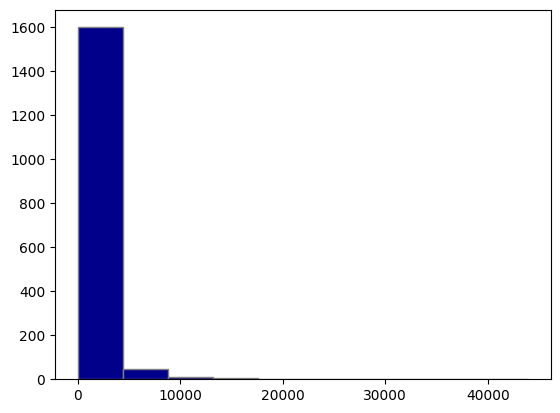

In [50]:
# Visualize distribution
plt.hist(ports["vessel_count_total"], edgecolor = "grey", color="darkblue")

In [45]:
# Create a new variable:
ports["vessel_count_category"] = "medium"

ports.loc[ports["vessel_count_total"] <= ports["vessel_count_total"].quantile(0.25), "vessel_count_category"] = "low"
ports.loc[ports["vessel_count_total"] > ports["vessel_count_total"].quantile(0.75), "vessel_count_category"] = "high"

In [46]:
ports[["vessel_count_category", "vessel_count_total"]].head(10)

,vessel_count_category,vessel_count_total
0,medium,481
1,low,91
2,high,1670
3,high,4366
4,medium,233
5,medium,444
6,medium,171
7,medium,883
8,medium,196
9,medium,487


<Axes: xlabel='vessel_count_category', ylabel='count'>

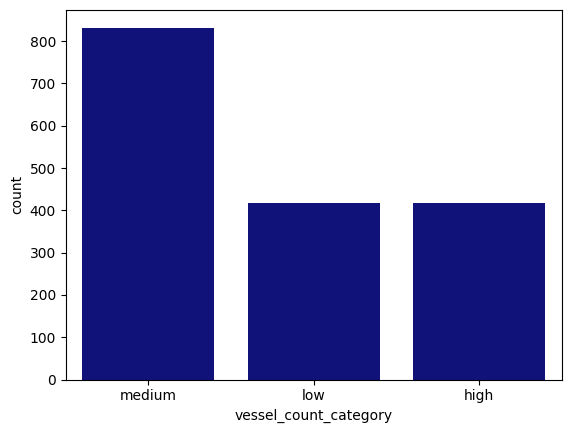

In [51]:
# Create a count plot to show the distribution of category
sns.countplot(ports, x = "vessel_count_category", color = "darkblue")

## Grouping & Aggregation

### Vessel count statistics by continents
- Group the data by continent and calculate the sum, mean, median, standard deviation, min, and max of vessel_count_total.
- Present results in a table showing statistics for each continent. Discuss the implications of high/low average vessel counts.
- Rationale: Gives a high-level overview of port activity by continent.
- Interpretation Task: Which continent has the highest total vessel count? Which has the highest average? What could explain the differences between mean and median values?]

In [56]:
# Group the data by continent and calculate the sum, mean, median, standard deviation, min, and max of vessel_count_total.
ports_groupby_continent = ports.groupby("continent").agg(
    vessel_sum = ("vessel_count_total", "sum"),
    vessel_mean = ("vessel_count_total", "mean"),
    vessel_median = ("vessel_count_total", "median"),
    vessel_std = ("vessel_count_total", "std"),
    vessel_min = ("vessel_count_total", "min"),
    vessel_max = ("vessel_count_total", "max")    
)

ports_groupby_continent

,vessel_sum,vessel_mean,vessel_median,vessel_std,vessel_min,vessel_max
continent,,,,,,
Africa,69146,497.453237,285.0,624.853122,0,4004
Asia & Pacific,887851,1432.017742,435.0,3072.167432,0,43959
Europe,459511,895.732943,420.0,1608.648589,0,23374
North America,134138,511.977099,224.0,808.149923,0,7342
South America,63048,477.636364,234.5,676.922620,0,4943


**Discussion: Implications of High/Low Average Vessel Counts**
Average vessel counts give us insight into how busy ports are within each continent.

- High average vessel counts, as seen in Asia & Pacific (1432 vessels), suggest the presence of major global trade hubs, possibly due to strong manufacturing economies, high export volumes, and well-developed port infrastructure. These regions may require advanced logistics and investment in capacity management.

- Low average vessel counts, such as in Africa (497 vessels) and South America (478 vessels), might point to less global trade volume or underdeveloped port infrastructure. However, it could also highlight opportunities for growth and investment in maritime logistics in these regions.

**Rationale: High-Level Overview of Port Activity by Continent**
This summary provides a snapshot of port activity, highlighting which continents play central roles in global maritime trade. By comparing key statistics (sum, mean, median, etc.), we gain insight into the scale, distribution, and consistency of vessel traffic in each region.

**Interpretation Task**
- Which continent has the highest total vessel count?
→ Asia & Pacific with 887,851 vessels in total.
This suggests that it’s a central hub for global shipping, likely due to its large volume of imports/exports and many busy ports like those in China, Singapore, and South Korea.

- Which has the highest average vessel count per port?
→ Again, Asia & Pacific leads with an average of 1432.02 vessels per port, reinforcing its dominance in maritime activity.

- What could explain the differences between mean and median values?
The mean is sensitive to extreme values, while the median gives the middle point of the distribution. In regions like Asia & Pacific and Europe, the mean is much higher than the median, which indicates a skewed distribution — a few extremely busy ports are pulling the average up, while most ports have moderate activity.
For example, in Europe:

    - Mean = 853.7

    - Median = 420
→ This gap suggests a few very high-traffic ports (e.g., Rotterdam, Hamburg) amid many smaller ones.